In [63]:
#link: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv("Car details v3.csv")

In [3]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [4]:
df.shape

(8128, 13)

In [5]:
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [6]:
df.duplicated().any()

True

In [7]:
df = df.drop_duplicates()
df.shape

(6926, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [9]:
df.drop(['torque'], axis=1, inplace=True)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

In [10]:
#Check missing values
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
seats             True
dtype: bool

In [11]:
#Missing values in Percentage of the Total Sample
df.isnull().sum() / df.shape[0] * 100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          3.003176
engine           3.003176
max_power        2.959861
seats            3.003176
dtype: float64

In [12]:
#Having more than 6000 samples, only 3% data is missing at max hence dropping such rows
df.dropna(axis=0, inplace=True)
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
seats            False
dtype: bool

In [13]:
df.shape

(6718, 12)

### Removing Units

In [14]:
#Removing units to handle the column as float columns
#Meethod-1
def remove_unit(df,colum_name) :
    t = []
    for i in df[colum_name]:
        number = str(i).split(' ')[0]
        t.append(number)
    return t


In [15]:
df['engine'] = remove_unit(df,'engine')
df['mileage'] = remove_unit(df,'mileage')
df['max_power'] = remove_unit(df,'max_power')

In [16]:
#Removing units to handle the column as float columns
#Method-2
# df['mileage'] = df['mileage'].str.strip('kmpl').str.strip('km/kg')
# df['engine'] = df['engine'].str.strip('CC')
# df['max_power'] = df['max_power'].str.strip('bhp').str.strip()
# df.head()

In [17]:
df['engine'] = pd.to_numeric(df['engine'])
df['mileage'] = pd.to_numeric(df['mileage'])
df['max_power'] = pd.to_numeric(df['max_power'])
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40    1248      74.00    5.0  
1  Individual       Manual  Second Owner    21.14    1498     103.52    5.0  
2  Individual       Manual   Third Owner    17.70    1497      78.00    5.0  
3  Individual       Manual   First Owner    23.00    1396      90.00    5.0  
4  Individual       Manual   First Owner    16.10    1298      88.20    5.0

In [18]:
type(df['engine'][0])

numpy.int64

In [19]:
#Adding 'age' feature to know how old the car is and dropping 'year' feature as it is useless now
df['age'] = 2021 - df['year']
df.drop(['year'],axis = 1,inplace = True)

In [20]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [21]:
#Ordinal encoding
df['owner'] = df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})
df.head()

name  selling_price  km_driven    fuel seller_type  \
0        Maruti Swift Dzire VDI         450000     145500  Diesel  Individual   
1  Skoda Rapid 1.5 TDI Ambition         370000     120000  Diesel  Individual   
2      Honda City 2017-2020 EXi         158000     140000  Petrol  Individual   
3     Hyundai i20 Sportz Diesel         225000     127000  Diesel  Individual   
4        Maruti Swift VXI BSIII         130000     120000  Petrol  Individual   

  transmission  owner  mileage  engine  max_power  seats  age  
0       Manual      1    23.40    1248      74.00    5.0    7  
1       Manual      2    21.14    1498     103.52    5.0    7  
2       Manual      3    17.70    1497      78.00    5.0   15  
3       Manual      1    23.00    1396      90.00    5.0   11  
4       Manual      1    16.10    1298      88.20    5.0   14

In [22]:
df['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [23]:
# Converting the datatype of 'seats' to string object since it is a categorical data
df['seats'] = df['seats'].astype(str)

# EDA

## Univariate Analysis

### 1. Plotting histogram to visualize the distribution of all the numerical data

In [24]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Selling Price in Rupee", "Total KM Driven", "Fuel Efficiency in KM per litre",
                                                   "Engine CC", "Brake Horse Power(BHP)", "Age of Car","Number of Seats"))

fig.add_trace(go.Histogram(x=df['selling_price'], name="Rupee"), row=1, col=1)

fig.add_trace(go.Histogram(x=df['km_driven'], name="KM"), row=1, col=2)

fig.add_trace(go.Histogram(x=df['mileage'], name="KM/L"), row=2, col=1)

fig.add_trace(go.Histogram(x=df['engine'], name="CC"), row=2, col=2)

fig.add_trace(go.Histogram(x=df['max_power'], name="BHP"), row=3, col=1)

fig.add_trace(go.Histogram(x=df['age'], name="Years"), row=3, col=2)

fig.update_layout(height=1400, width=800, title_text="Distribution of numerical data")
fig.show()

#### From the histograms above, we can see the 'selling_price', 'km_driven', 'max_power' and 'age' plots look like a positively-skewed distribution, while 'mileage' look somewhat like a normal curve and 'engine' does not look like to follow a certain distribution.

### 2. Plotting Boxplots to explore all the numerical data

In [25]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Selling Price in Rupee", "Total KM Driven", "Fuel Efficiency in KM per litre",
                                                   "Engine CC", "Brake Horse Power(BHP)", "Age of Car","Number of Seats"))

fig.add_trace(go.Box(x=df['selling_price'], name="Rupee"), row=1, col=1)

fig.add_trace(go.Box(x=df['km_driven'], name="KM"), row=1, col=2)

fig.add_trace(go.Box(x=df['mileage'], name="KM/L"), row=2, col=1)

fig.add_trace(go.Box(x=df['engine'], name="CC"), row=2, col=2)

fig.add_trace(go.Box(x=df['max_power'], name="BHP"), row=3, col=1)

fig.add_trace(go.Box(x=df['age'], name="Years"), row=3, col=2)

fig.update_layout(height=1400, width=800, title_text="Distribution of numerical data")
fig.show()

#### From the box plots above, we can see all of them contain some sort of outliers. We will decide later during the feature engineering phase to decide which outlier to be removed.

### 3. Plotting Bar Graphs to show the distribution of all the categorical data

In [26]:
count_fuel = df['fuel'].value_counts().reset_index()
count_fuel = count_fuel.rename(columns = {'index':'fuel','fuel':'count'})

count_seller = df['seller_type'].value_counts().reset_index()
count_seller = count_seller.rename(columns = {'index':'seller_type','seller_type':'count'})

count_transmission = df['transmission'].value_counts().reset_index()
count_transmission = count_transmission.rename(columns = {'index':'transmission','transmission':'count'})

count_owner = df['owner'].value_counts().reset_index()
count_owner = count_owner.rename(columns = {'index':'owner','owner':'count'})

count_seats = df['seats'].value_counts().reset_index()
count_seats = count_seats.rename(columns = {'index':'seats','seats':'count'})

In [27]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Fuel Type", "Seller Type", "Transmission Type", "Number of Owners", "Number of Seats"))

fig.add_trace(go.Bar(y=count_fuel['count'], x=count_fuel['fuel'], name="Fuel type"), row=1, col=1)

fig.add_trace(go.Bar(y=count_seller['count'], x=count_seller['seller_type'], name="Seller type"), row=1, col=2)

fig.add_trace(go.Bar(y=count_transmission['count'], x=count_transmission['transmission'], name="Transmission"), row=2, col=1)

fig.add_trace(go.Bar(y=count_owner['count'], x=count_owner['owner'], name="Number of owners"), row=2, col=2)

fig.add_trace(go.Bar(y=count_seats['count'], x=count_seats['seats'], name="Number of seats"), row=3, col=1)

fig.update_layout(height=1000, width=800, title_text="Distribution of categorical data")
fig.show()

## Bivariate/Multivariate Analysis

### 1. Plotting the correlation coefficient heatmap to visualize the relationship of each numericle variable

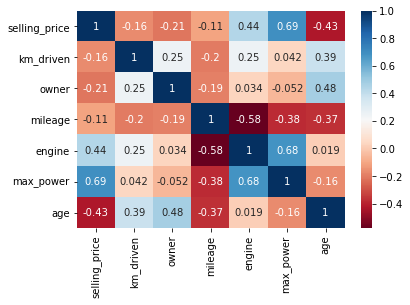

In [28]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

#### We can look at the selling_price row to see the correlation coefficient of each numerical feature to the target variable. And from it, we can tell the relationship between the features and the target variable. Higher coefficient represents stronger relationship between the two variables(regardless of the sign). Check for multicollinearity among the feature variable, as a rule of thumb, coefficient <+-0.8 is acceptable.

### 2. Plotting the scatterplots for each numerical variable to visualize their relationships

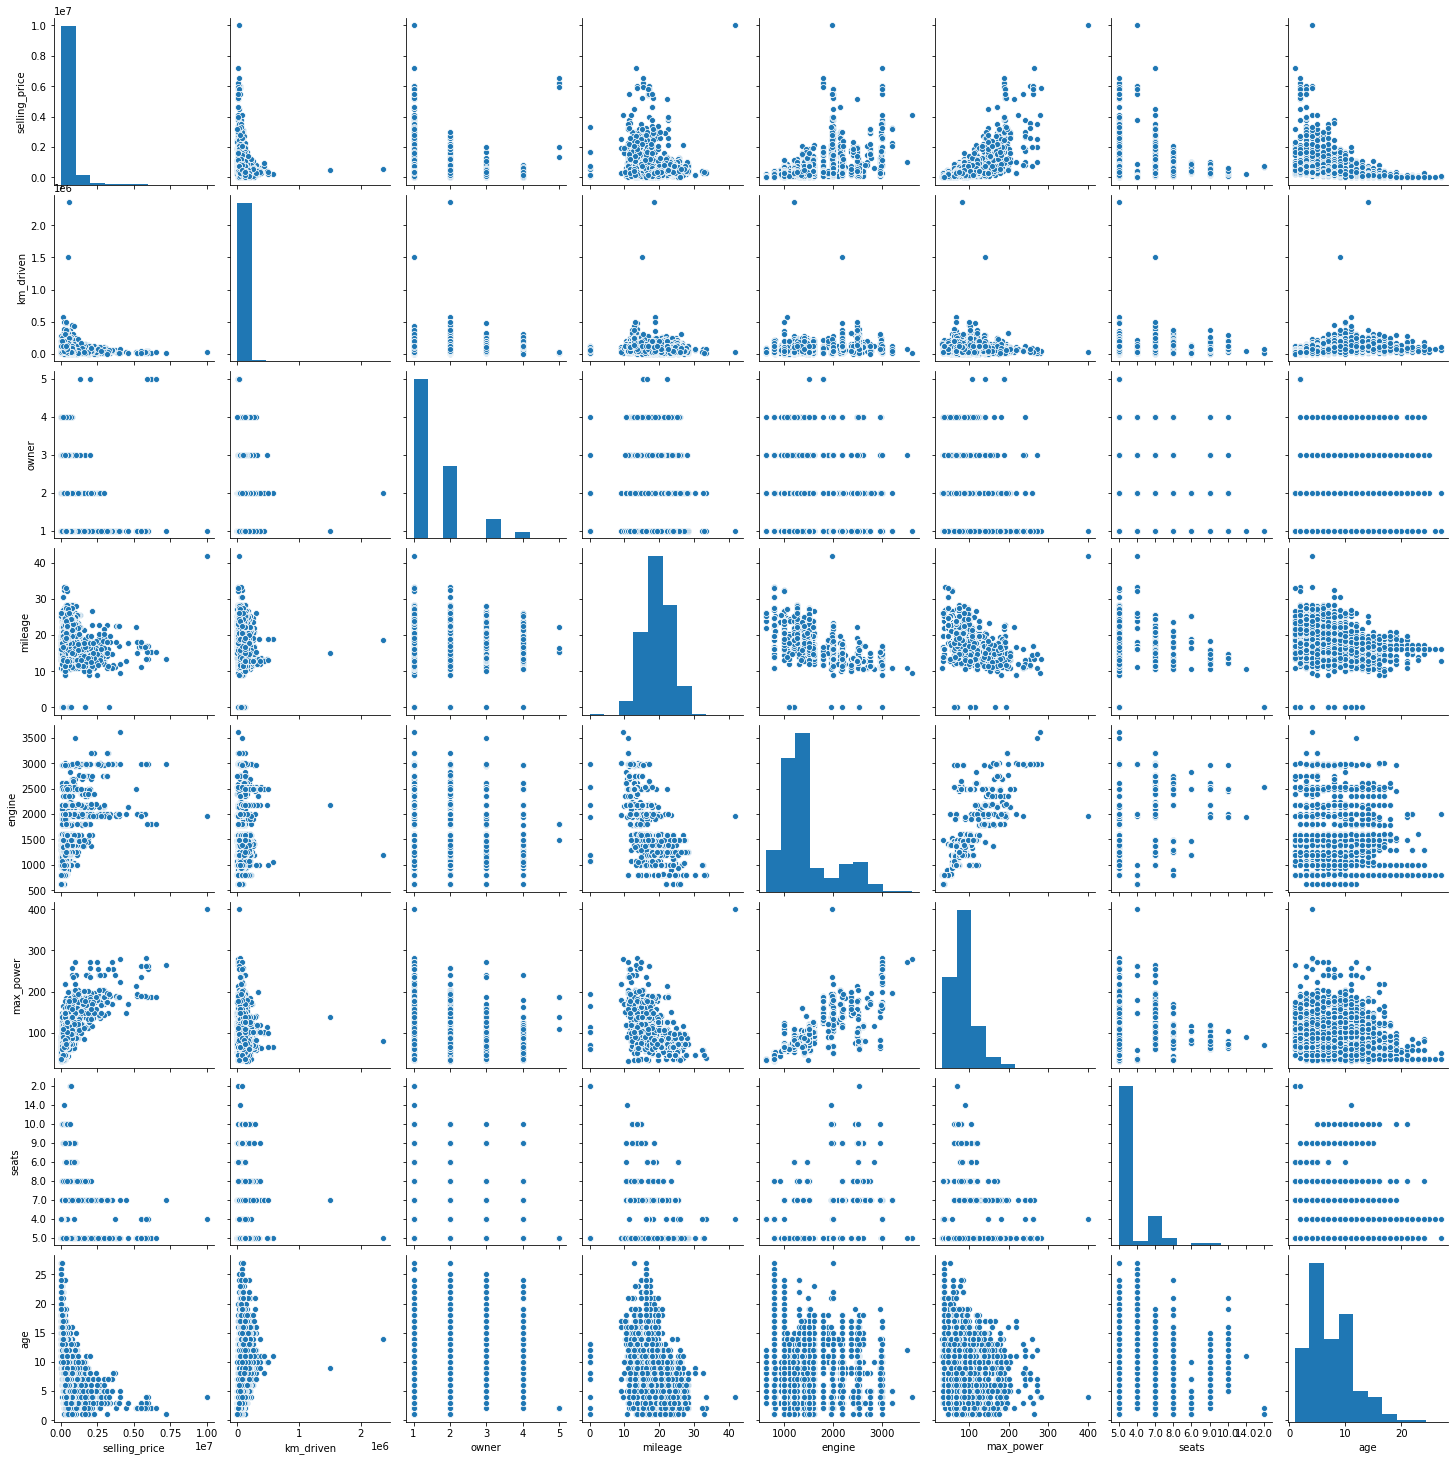

In [29]:
sns.pairplot(df)

# Feature Selection, Feature Engineering and Data Preparation for Modelling

#### Now, we look at each feature and decide which features we would like to include in training our model. Selecting features that represent the data well is crucial in building a model that generalize well(which is our ultimate goal). Some of the features can be engineered(Feature Engineering) so that they represent the data better and hence a better model can be built.For example, the original 'year' column tells us which year the car is bought, if we slightly engineer the data by deducting the 'year' column from now(2021 as of writing this), we can get the age of the car which is an important factor when we are considering to buy an used car. You can think of features as the food for a growing baby(model)- the more nutritious food(better features) you feed the baby, the smarter(better prediction) the baby becomes. So, feature selection and feature engineering are as important as choosing a good model to fit your data.

### 1. Feature Engineering

In [30]:
# Make a copy of the data for modelling
df_model = df.copy()

# Create the 'brand' column by splitting the 'name' column
df_model['brand'] = df_model['name'].str.split(' ').str.get(0)
df_model.drop(['name'],axis=1,inplace=True)

# Filter the outlier and log-transform the target variable('selling_price')
df_model = df_model[df_model['selling_price'] < 2500000]
df_model['selling_price'] = np.log(df_model['selling_price'])

# Filter the outlier in 'km_driven' feature
df_model = df_model[df_model['km_driven'] < 300000]

# Filter the unwanted rows in 'fuel' feature
df_model = df_model[~df_model['fuel'].isin(['CNG','LPG'])]

# Filter the outliers in 'mileage' feature
df_model = df_model[(df_model['mileage'] > 5) & (df_model['mileage'] < 35)]

# Filter the outlier in 'max_power' feature and log-transform the data.
df_model = df_model[df_model['max_power'] < 300]
df_model['max_power'] = np.log(df_model['max_power'])

# Log-transform the 'age' feature data.
df_model['age'] = np.log(df_model['age'])

df_model.head()

selling_price  km_driven    fuel seller_type transmission  owner  mileage  \
0      13.017003     145500  Diesel  Individual       Manual      1    23.40   
1      12.821258     120000  Diesel  Individual       Manual      2    21.14   
2      11.970350     140000  Petrol  Individual       Manual      3    17.70   
3      12.323856     127000  Diesel  Individual       Manual      1    23.00   
4      11.775290     120000  Petrol  Individual       Manual      1    16.10   

   engine  max_power seats       age    brand  
0    1248   4.304065   5.0  1.945910   Maruti  
1    1498   4.639765   5.0  1.945910    Skoda  
2    1497   4.356709   5.0  2.708050    Honda  
3    1396   4.499810   5.0  2.397895  Hyundai  
4    1298   4.479607   5.0  2.639057   Maruti

In [31]:
print(df_model['brand'].unique())

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'Nissan' 'MG' 'BMW' 'Daewoo' 'Volvo' 'Kia' 'Fiat' 'Jaguar'
 'Force' 'Ambassador' 'Ashok' 'Opel' 'Isuzu' 'Land']


### 2. One-hot encoding to represent the categorical data for regression modelling

In [32]:
df_model = pd.get_dummies(data = df_model, drop_first=True)
df_model.head()

selling_price  km_driven  owner  mileage  engine  max_power       age  \
0      13.017003     145500      1    23.40    1248   4.304065  1.945910   
1      12.821258     120000      2    21.14    1498   4.639765  1.945910   
2      11.970350     140000      3    17.70    1497   4.356709  2.708050   
3      12.323856     127000      1    23.00    1396   4.499810  2.397895   
4      11.775290     120000      1    16.10    1298   4.479607  2.639057   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0            0                       1                             0  ...   
1            0                       1                             0  ...   
2            1                       1                             0  ...   
3            0                       1                             0  ...   
4            1                       1                             0  ...   

   brand_Mercedes-Benz  brand_Mitsubishi  brand_Nissan  brand_Opel  \
0                    0                 0             0           0   
1                    0                 0             0           0   
2                    0                 0             0           0   
3                    0                 0             0           0   
4                    0                 0             0           0   

   brand_Renault  brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  \
0              0            0           0             0                 0   
1              0            1           0             0                 0   
2              0            0           0             0                 0   
3              0            0           0             0                 0   
4              0            0           0             0                 0   

   brand_Volvo  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 47 columns]

### 3. Assigning the feature variables and the target variable

In [33]:
df_model.columns

Index(['selling_price', 'km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'age', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual', 'seats_14.0',
       'seats_4.0', 'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0',
       'seats_9.0', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo'],
      dtype='object')

In [34]:
X = df_model.drop(['selling_price'],axis=1)
y = df_model['selling_price']

### 4. Splitting the dataset into training set(for modelling) and test set(for evaluation)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (5204, 46)
x test:  (1301, 46)
y train:  (5204,)
y test:  (1301,)


### 5. Scaling the numerical data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_var = ['km_driven', 'mileage', 'engine', 'max_power', 'age']
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

### 6. Automatic feature selection using Recursive Feature Elimination(RFE). I have just learnt about RFE and I am implementing RFE as an extra experiment to check the effectiveness of RFE on model performance.

In [37]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
select = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)

### 7. Main function to fit all regression model, check r2_score,check cross-validation score, plot residual plot and plot scatterplot of y_test_prediction vs y_test

In [38]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores = []
r2_test_scores = []
cv_mean = []

def car_price_prediction_model(model):
    model.fit(X_train, y_train)
    
    #R2 score of training set
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_scores.append(round(r2_train,2))
    
    #R2 score of test set
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_scores.append(round(r2_test,2))
    
    # CV score of training set
    cv_training = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean_training = cv_training.mean()
    cv_mean.append(round(cv_mean_training,2))
    
    # Printing each score
    print("Training set R2 scores: ",round(r2_train,2))
    print("Test set R2 scores: ",round(r2_test,2))
    print("Training cross validation score: ", cv_training)
    print("Training cross validation mean score: ",round(cv_mean_training,2))
    
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_train_pred),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_pred')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

### 8. Main function to fit all regression model based on the RFE-dataset, check r2_score,check cross-validation score, plot residual plot and plot scatterplot of y_test_prediction_rfe vs y_test

In [39]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores_rfe = []
r2_test_scores_rfe = []
cv_mean_rfe = []

def car_price_prediction_model_rfe(model):
    model.fit(X_train_rfe, y_train)
    
    
    #R2 score of RFE training set
    y_train_pred_rfe = model.predict(X_train_rfe)
    r2_train_rfe = r2_score(y_train, y_train_pred_rfe)
    r2_train_scores_rfe.append(round(r2_train_rfe,2))
    
    #R2 score of RFE test set
    y_test_pred_rfe = model.predict(X_test_rfe)
    r2_test_rfe = r2_score(y_test, y_test_pred_rfe)
    r2_test_scores_rfe.append(round(r2_test_rfe,2))

    # CV score of RFE training set
    cv_training_rfe = cross_val_score(model, X_train_rfe, y_train, cv=5)
    cv_mean_training_rfe = cv_training_rfe.mean()
    cv_mean_rfe.append(round(cv_mean_training_rfe,2))
    
    # Printing each score
    print("Training set R2 scores: ",round(r2_train_rfe,2))
    print("Test set R2 scores: ",round(r2_test_rfe,2))
    print("Training cross validation score: ", cv_training_rfe)
    print("Training cross validation mean score: ",round(cv_mean_training_rfe,2))
    
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of RFE-Train samples')
    sns.distplot((y_train-y_train_pred_rfe),hist = False,ax = ax[0])
    ax[0].set_xlabel('residual')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test_rfe')
    ax[1].scatter(x = y_test, y = y_test_pred_rfe)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test_rfe')
    
    plt.show()

# Regression Modelling and Evaluation

## 1. Linear Regression(Ordinary Least Square)

Training set R2 scores:  0.86
Test set R2 scores:  0.85
Training cross validation score:  [0.85684275 0.84834677 0.85283797 0.86353878 0.8388678 ]
Training cross validation mean score:  0.85


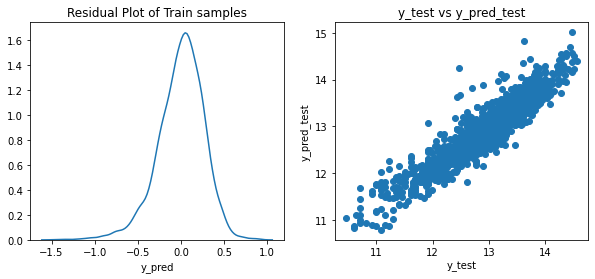

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
car_price_prediction_model(lm)

### RFE Version

Training set R2 scores:  0.86
Test set R2 scores:  0.85
Training cross validation score:  [0.856474   0.84860411 0.85297032 0.86276529 0.8396717 ]
Training cross validation mean score:  0.85


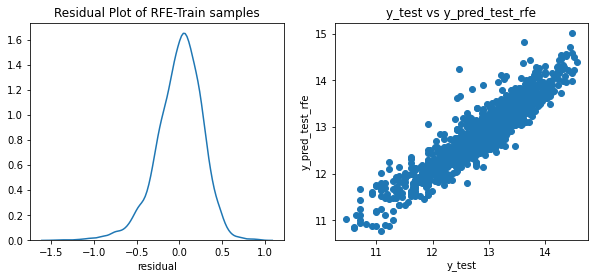

In [41]:
car_price_prediction_model_rfe(lm)

## 2. Linear Regression(Ridge)

Training set R2 scores:  0.86
Test set R2 scores:  0.85
Training cross validation score:  [0.85702566 0.8485021  0.85331977 0.86327288 0.8394045 ]
Training cross validation mean score:  0.85


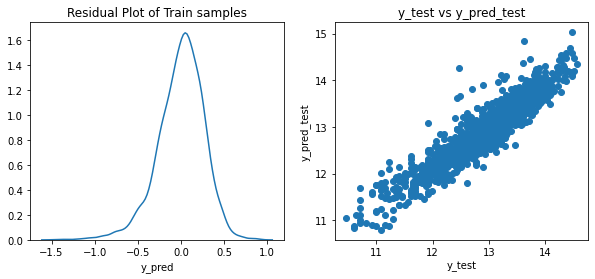

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))
car_price_prediction_model(rg_rs)

### RFE Version

Training set R2 scores:  0.86
Test set R2 scores:  0.85
Training cross validation score:  [0.85690609 0.8484388  0.85367196 0.86309099 0.8395961 ]
Training cross validation mean score:  0.85


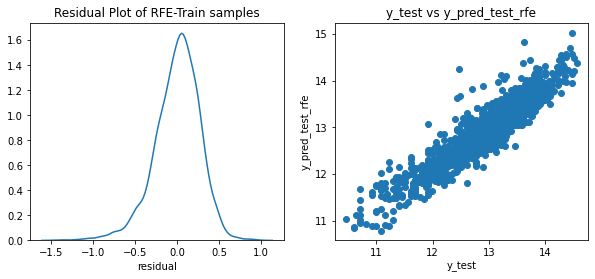

In [43]:
car_price_prediction_model_rfe(rg_rs)

## 3. Linear Regression(Lasso)

Training set R2 scores:  0.84
Test set R2 scores:  0.84
Training cross validation score:  [0.85091875 0.84544642 0.85081583 0.85928749 0.8353726 ]
Training cross validation mean score:  0.85


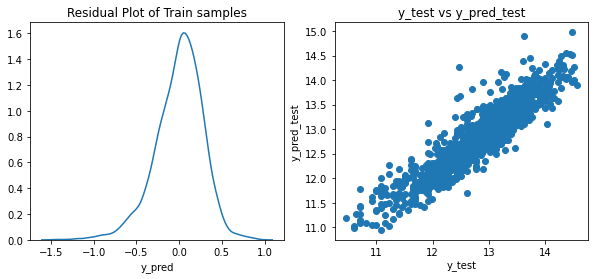

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14)
ls_rs = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))
car_price_prediction_model(ls_rs)

### RFE Version

Training set R2 scores:  0.85
Test set R2 scores:  0.85
Training cross validation score:  [0.85091875 0.84544642 0.82919804 0.85928749 0.8353726 ]
Training cross validation mean score:  0.84


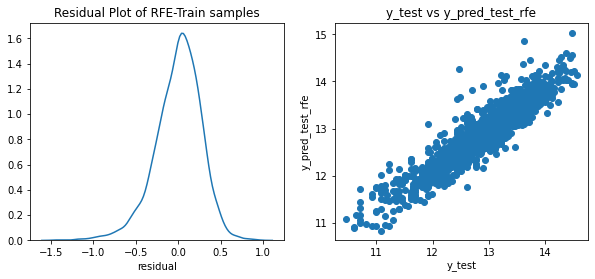

In [45]:
car_price_prediction_model_rfe(ls_rs)

## 4. Extreme Gradient Boosting Regressor

In [46]:
from xgboost import XGBRegressor
xg = XGBRegressor(verbosity= 0)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

xg_rs = RandomizedSearchCV(estimator=xg, param_distributions=parameter_grid)

Training set R2 scores:  0.96
Test set R2 scores:  0.92
Training cross validation score:  [0.90090557 0.91510029 0.91474393 0.90454322 0.90811957]
Training cross validation mean score:  0.91


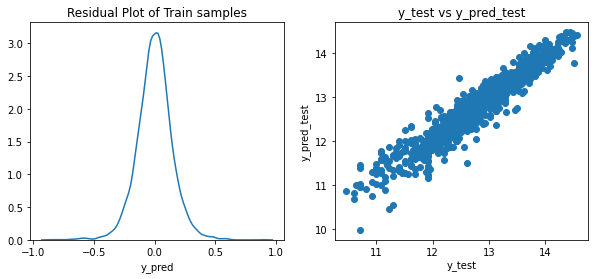

In [47]:
car_price_prediction_model(xg_rs)

### RFE Version

Training set R2 scores:  0.94
Test set R2 scores:  0.92
Training cross validation score:  [0.91535287 0.91451704 0.91523817 0.90579777 0.90512776]
Training cross validation mean score:  0.91


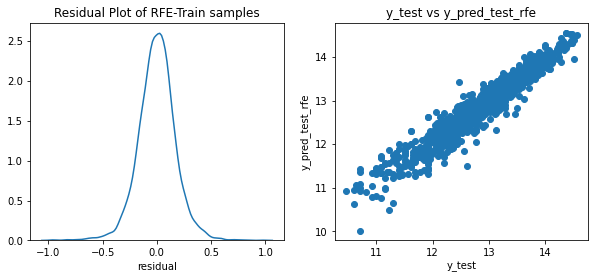

In [48]:
car_price_prediction_model_rfe(xg_rs)

## 5. Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.5s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.2s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.4s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.4s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.3s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.2s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   6.3s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.5s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.4s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.1s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.5s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.5s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.0s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.5s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.8s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.1s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.9s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   5.3s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   5.4s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   5.8s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   5.8s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   5.7s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.2s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.5s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.2s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   5.5s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.1s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.0s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.5s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


Training set R2 scores:  0.92
Test set R2 scores:  0.91
Training cross validation score:  [-0.05368262 -0.05031705 -0.05210407 -0.05589233 -0.05854378]
Training cross validation mean score:  -0.05


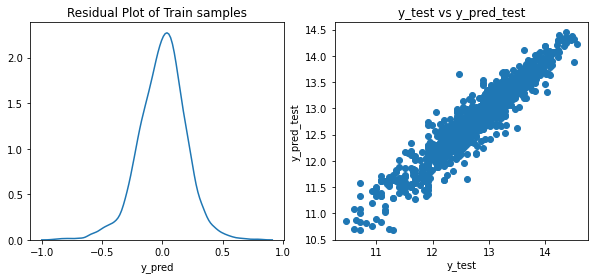

In [50]:
car_price_prediction_model(rf_rs)

### RFE Version

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   5.5s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   5.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.4s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.5s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.1s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   5.0s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   6.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   6.2s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   6.1s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   8.8s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.7s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   5.4s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   5.5s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   5.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   5.7s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   7.6s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.9s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.5s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.4s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.3s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.6s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   4.2s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.9s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.8s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.0s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.3s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.8s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   2.5s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4 
[CV]  n_estimators=900, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=4, total=   4.1s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


Training set R2 scores:  0.92
Test set R2 scores:  0.91
Training cross validation score:  [-0.05369421 -0.05004782 -0.05204012 -0.05627964 -0.05910754]
Training cross validation mean score:  -0.05


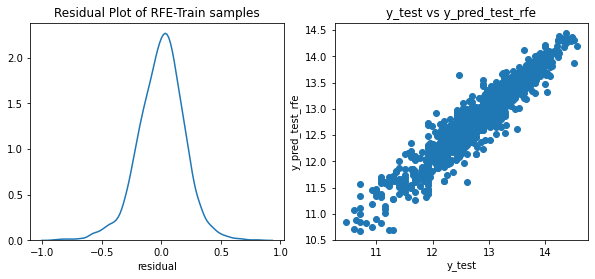

In [51]:
car_price_prediction_model_rfe(rf_rs)

## 6. Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)
#n_jobs = Number of Cores of the laptop used

In [1]:
gb_rs

NameError: name 'gb_rs' is not defined

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.8s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.8s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.9s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.8s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.8s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.2s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.3s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.4s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.2s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.7s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.7s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.6s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   0.9s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


Training set R2 scores:  0.94
Test set R2 scores:  0.92
Training cross validation score:  [-0.04409003 -0.03828123 -0.0425224  -0.04586382 -0.04926907]
Training cross validation mean score:  -0.04


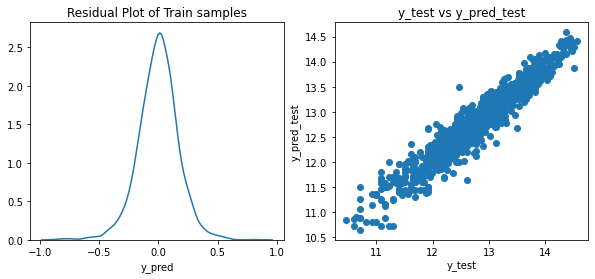

In [53]:
car_price_prediction_model(gb_rs)

### RFE Version

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.9s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.9s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.9s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.9s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.9s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.3s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.3s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.3s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.3s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.8s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.2s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.0s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


Training set R2 scores:  0.94
Test set R2 scores:  0.92
Training cross validation score:  [-0.04400443 -0.0381474  -0.04135757 -0.04531383 -0.0486492 ]
Training cross validation mean score:  -0.04


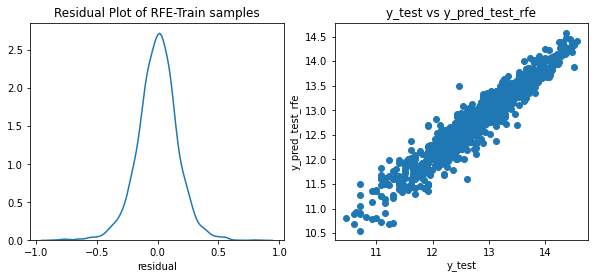

In [54]:
car_price_prediction_model_rfe(gb_rs)

# Model Evaluation and Conclusion

In [55]:
algo = ["LinearRegression(OLS)","LinearRegression(Ridge)","LinearRegression(Lasso)", "ExtremeGradientBoostingRegressor","RandomForestRegressor","GradientBoostingRegressor"]

model_eval = pd.DataFrame({'Model': algo,'R Squared(Train)': r2_train_scores,'R Squared(Test)': r2_test_scores, 'CV score mean(Train)': cv_mean})
display(model_eval)

Model  R Squared(Train)  R Squared(Test)  \
0             LinearRegression(OLS)              0.86             0.85   
1           LinearRegression(Ridge)              0.86             0.85   
2           LinearRegression(Lasso)              0.84             0.84   
3  ExtremeGradientBoostingRegressor              0.96             0.92   
4             RandomForestRegressor              0.92             0.91   
5         GradientBoostingRegressor              0.94             0.92   

   CV score mean(Train)  
0                  0.85  
1                  0.85  
2                  0.85  
3                  0.91  
4                 -0.05  
5                 -0.04

In [56]:
model_eval_RFE = pd.DataFrame({'Model': algo,'R Squared(Train)': r2_train_scores_rfe,'R Squared(Test)': r2_test_scores_rfe,'CV score mean(Train)': cv_mean_rfe})
display(model_eval_RFE)

Model  R Squared(Train)  R Squared(Test)  \
0             LinearRegression(OLS)              0.86             0.85   
1           LinearRegression(Ridge)              0.86             0.85   
2           LinearRegression(Lasso)              0.85             0.85   
3  ExtremeGradientBoostingRegressor              0.94             0.92   
4             RandomForestRegressor              0.92             0.91   
5         GradientBoostingRegressor              0.94             0.92   

   CV score mean(Train)  
0                  0.85  
1                  0.85  
2                  0.84  
3                  0.91  
4                 -0.05  
5                 -0.04

# Conclusion

1. Gradient Boosting Regressor is the model I will choose since it has the highest CV score(91%) which mean it generalize better than other models.

2. Linear model is also a great model choice if we have computational power constraint since the non-linear model are quite computational expensive.

3. The automatic feature selection(RFE) did not make significant improvement on all of the models. Hence we do not need it unless computational time is of concern.

In [57]:
gb_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2 
[CV]  n_estimators=600, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=4, learning_rate=0.2, total=   0.7s
[CV] n_estimators=700, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=8, learning_rate=0.01 
[CV]  n_estimators=

[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01, total=   1.1s
[CV] n_estimators=900, min_samples_split=4, min_samples_leaf=5, max_features=sqrt, max_depth=4, learning_rate=0.01 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
predictions = gb_rs.predict(X_test)

In [59]:
predictions

array([12.0069643 , 14.36142124, 12.13736047, ..., 13.28012239,
       13.58118118, 13.29543303])

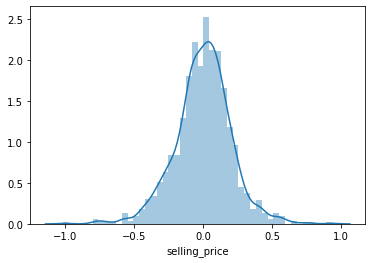

In [60]:
sns.distplot(y_test-predictions)

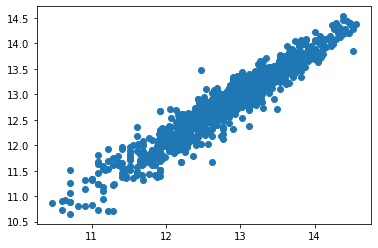

In [61]:
plt.scatter(y_test, predictions)

In [62]:
import pickle
#open the file where you want to store the data
file = open('gradient_boosting_regressor_model.pkl', 'wb')
#dump information to the file
pickle.dump(gb_rs, file)